In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from os import listdir
import matplotlib.pyplot as plt

# Calculate result

In [2]:
cost_rate = 0.001425*0.6
tax_rate = 0.003

def calculate_profit(x):
    if x['spread_in'] > 0:
        # buy stock_1, short stock_2
        stock_1_profit = (
            x['stock_1_out'] - x['stock_1_in'] -
            cost_rate*(x['stock_1_in']+x['stock_1_out']) -
            tax_rate*(x['stock_1_out'])
        )*abs(x['hedge_ratio_in'])
        stock_2_profit = (
            x['stock_2_in'] - x['stock_2_out'] -
            cost_rate*(x['stock_2_in']+x['stock_2_out']) -
            tax_rate*(x['stock_2_out'])
        )*1000
    else:
        # short stock_1, buy stock_2
        stock_1_profit = (
            x['stock_1_in'] - x['stock_1_out'] -
            cost_rate*(x['stock_1_in']+x['stock_1_out']) -
            tax_rate*(x['stock_1_out'])
        )*abs(x['hedge_ratio_in'])
        stock_2_profit = (
            x['stock_2_out'] - x['stock_2_in'] -
            cost_rate*(x['stock_2_in']+x['stock_2_out']) -
            tax_rate*(x['stock_2_out'])
        )*1000

    total_profit = stock_1_profit + stock_2_profit
    
    return [stock_1_profit, stock_2_profit, total_profit]

In [3]:
result = pd.DataFrame()
for csv_file in listdir()[2:]:
    trade_result = pd.read_csv(csv_file)
    trade_result['date_in'] = trade_result['date_in'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    trade_result['date_out'] = trade_result['date_out'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    trade_result['stock_1_profit'] = None
    trade_result['stock_2_profit'] = None
    trade_result['net_profit'] = None

    trade_result = trade_result.copy()
    for i in range(len(trade_result)):
        temp_result = trade_result.iloc[i]
        trade_result.loc[i, ['stock_1_profit', 'stock_2_profit', 'net_profit']] = calculate_profit(temp_result)

    accumulate_profit = trade_result.net_profit.values.cumsum()

    drawdown = []
    for i in range(len(accumulate_profit)):
        current_accumulate_profit = accumulate_profit[i]
        if i == 0:
            new_highest = accumulate_profit[i]
            drawdown.append(0)
        else:
            if (current_accumulate_profit > new_highest) and (current_accumulate_profit > 0):
                new_highest = current_accumulate_profit 
            if (current_accumulate_profit < new_highest):
                drawdown.append(current_accumulate_profit-new_highest)
            else:
                drawdown.append(0)

    profit = accumulate_profit[-1]
    highest_equity = 0 if max(accumulate_profit) < 0 else max(accumulate_profit)
    MDD = min(drawdown)
    temp_result = pd.DataFrame([[csv_file, profit, highest_equity, MDD, len(trade_result)]],
                               columns=['strategy', 'profit', 'highest_equity', 'MDD', 'total_trade_num'])
    catergory = pd.DataFrame([trade_result.groupby('reason').count().T.iloc[0]])
    catergory.reset_index(drop=True, inplace=True)
    temp_result = pd.concat([temp_result, catergory], axis=1)
    result = pd.concat([
        result, temp_result
    ])
    print("   ", csv_file)

    trade_result_finance_ASR_2.5_Num_10.csv
    trade_result_finance_ASR_2.5_Num_10_stop_loss_5_take_profit_0.001.csv
    trade_result_finance_ASR_2.5_Num_5.csv
    trade_result_finance_ASR_2_Num_10.csv
    trade_result_finance_ASR_3_Num_30.csv
    trade_result_finance_ASR_3_Num_30_ADF_2.5.csv
    trade_result_finance_ASR_3_Num_30_ADF_3.csv
    trade_result_finance_ASR_3_Num_30_stop_loss_6.csv


In [4]:
comparison = result.sort_values('profit', ascending=False)
comparison

,strategy,profit,highest_equity,MDD,total_trade_num,cointegration_invalid,reversion,stop_loss,take_profit
0,trade_result_finance_ASR_3_Num_30_stop_loss_6.csv,-11331.116626,21897.006937,-54536.004535,900,519,149,2,230
0,trade_result_finance_ASR_3_Num_30_ADF_3.csv,-27293.362289,13139.815978,-51918.515553,910,424,142,128,216
0,trade_result_finance_ASR_3_Num_30_ADF_2.5.csv,-62302.737332,25368.150782,-94276.624624,1786,1025,230,180,351
0,trade_result_finance_ASR_2.5_Num_5.csv,-99836.292916,0.000000,-106084.444759,1067,581,166,86,234
0,trade_result_finance_ASR_3_Num_30.csv,-115118.219050,14724.071070,-129842.290119,2844,1896,302,200,446
0,trade_result_finance_ASR_2.5_Num_10.csv,-126987.204217,0.000000,-132556.401444,2098,1221,285,145,447
0,trade_result_finance_ASR_2_Num_10.csv,-132430.989464,0.000000,-123295.205799,2163,1079,382,162,540
0,trade_result_finance_ASR_2.5_Num_10_stop_loss_...,-139432.571851,0.000000,-140184.520242,1680,1130,530,19,1


# Visualiztion

    trade_result_finance_ASR_3_Num_30_stop_loss_6.csv
    trade_result_finance_ASR_3_Num_30_ADF_3.csv
    trade_result_finance_ASR_3_Num_30_ADF_2.5.csv
    trade_result_finance_ASR_2.5_Num_5.csv
    trade_result_finance_ASR_3_Num_30.csv
    trade_result_finance_ASR_2.5_Num_10.csv
    trade_result_finance_ASR_2_Num_10.csv
    trade_result_finance_ASR_2.5_Num_10_stop_loss_5_take_profit_0.001.csv


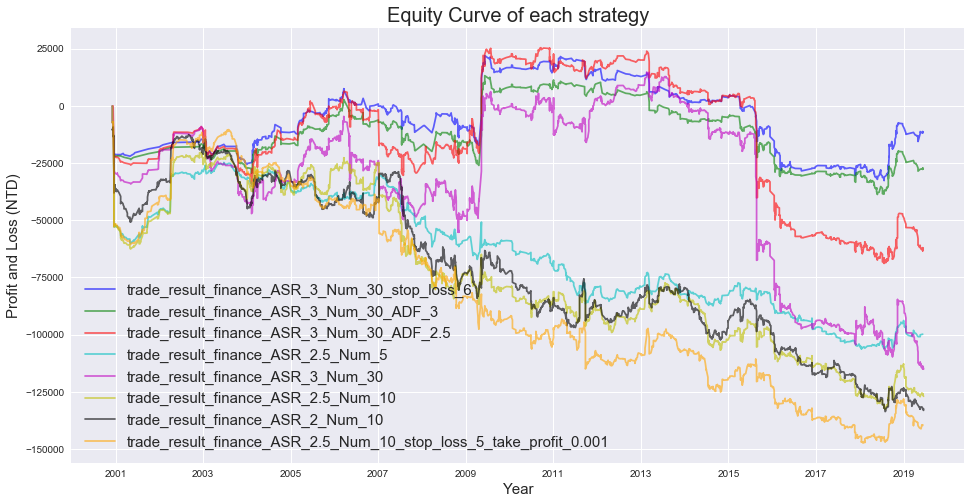

In [5]:
plt.figure(figsize=(16, 8))
plt.style.use('seaborn')
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

for ix in range(len(comparison.strategy.values)):
    csv_file = comparison.strategy.values[ix]
    trade_result = pd.read_csv(csv_file)
    trade_result['date_in'] = trade_result['date_in'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    trade_result['date_out'] = trade_result['date_out'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    trade_result['stock_1_profit'] = None
    trade_result['stock_2_profit'] = None
    trade_result['net_profit'] = None

    trade_result = trade_result.copy()
    for i in range(len(trade_result)):
        temp_result = trade_result.iloc[i]
        trade_result.loc[i, ['stock_1_profit', 'stock_2_profit', 'net_profit']] = calculate_profit(temp_result)

    accumulate_profit = trade_result.net_profit.values.cumsum()
    plt.plot(trade_result.date_out, accumulate_profit,
             label=csv_file.split('.csv')[0], color=color[ix], alpha=0.6)
    print('   ', csv_file)

plt.legend(fontsize=15)
plt.title('Equity Curve of each strategy', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Profit and Loss (NTD)', fontsize=15);

# Heatmap

In [6]:
trade_result = pd.read_csv('trade_result_finance_ASR_3_Num_30_stop_loss_6.csv')
trade_result['date_in'] = trade_result['date_in'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
trade_result['date_out'] = trade_result['date_out'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
trade_result['stock_1_profit'] = None
trade_result['stock_2_profit'] = None
trade_result['net_profit'] = None

trade_result = trade_result.copy()
for i in range(len(trade_result)):
    temp_result = trade_result.iloc[i]
    trade_result.loc[i, ['stock_1_profit', 'stock_2_profit', 'net_profit']] = calculate_profit(temp_result)
    
trade_result['month'] = trade_result.date_in.apply(lambda x: x.month)
trade_result['year'] = trade_result.date_in.apply(lambda x: x.year)
month_year_result = pd.DataFrame(
    trade_result.groupby(['year', 'month']).net_profit.agg("sum")
)
month_year_result = month_year_result.reset_index()

In [7]:
months = np.sort(month_year_result.month.unique())
years = np.sort(month_year_result.year.unique())
years = years[1:-1]

final_result = pd.DataFrame()
for year in years:
    inner_result = []
    for month in months:
        temp_result = month_year_result[month_year_result.year == year]
        temp_result = temp_result[temp_result.month == month]
        try:
            net_profit = temp_result.net_profit.values[0]
        except:
            net_profit = 0
        inner_result.append(net_profit)
    outter_result = pd.DataFrame([inner_result])
    outter_result.columns = months
    outter_result.index = [year]
    final_result = pd.concat([final_result, outter_result])
    
final_result = final_result.T
final_result = final_result/1000
final_result = final_result.round(0)

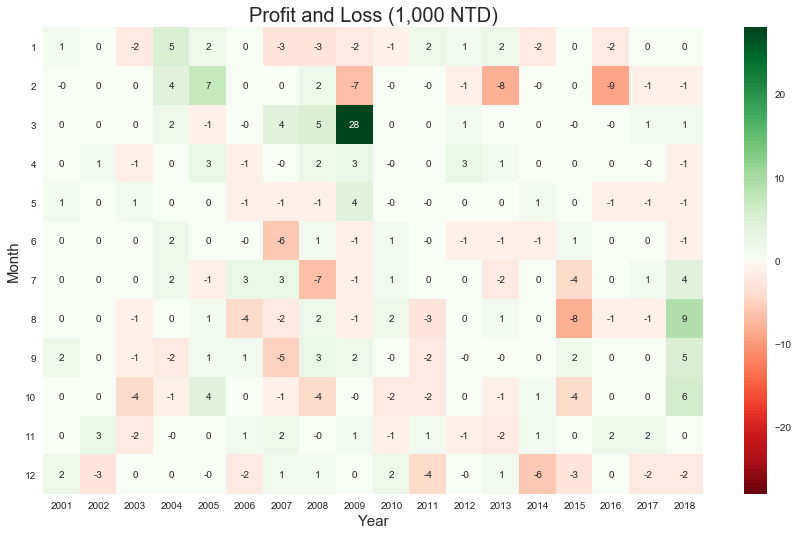

In [8]:
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap
top = cm.get_cmap('Reds_r', 64)
bottom = cm.get_cmap('Greens', 64)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

plt.figure(figsize=(12, 7))
ax = sns.heatmap(final_result, annot=True, cmap=newcmp,
                 vmax=final_result.max().max(),
                 vmin=-final_result.max().max()) # , fmt="d"
ax.set_xticklabels(years, size=10)
ax.set_yticklabels(months, size=10, rotation=360)
plt.tight_layout()
plt.xlabel('Year', size=15)
plt.ylabel('Month', size=15)

plt.title('Profit and Loss (1,000 NTD)', size=20);

# Reference
* Creating Colormaps in Matplotlib

  https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html